# Kobe Bryant - A data exploration adventure

This notebook documents my experience of cleaning and analysing the dataset of every shot attempted by Kobe Bryant, provided by Kaggle.

In [1]:
# import libraries to start
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'data.csv'

df = pd.read_csv(filename)
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [2]:
# 30697 total entried with 25 columns
# this information is held as a tuple
df.shape

(30697, 25)

In [3]:
np.random.permutation(len(df))[:3]

array([1530, 7807, 7445])

In [4]:
# let's take a random sample
# we use a numpy method, a random permutation, and set it to variable 'random_sample'
random_sample = df.take(np.random.permutation(len(df))[:3])
random_sample.T # aka: transpose

,27545,23759,1515
action_type,Jump Shot,Jump Shot,Layup Shot
combined_shot_type,Jump Shot,Jump Shot,Layup
game_event_id,246,204,47
game_id,40300311,29700521,20100012
lat,34.0273,34.0543,34.0443
loc_x,179,-130,0
loc_y,17,-10,0
lon,-118.091,-118.4,-118.27
minutes_remaining,8,5,5
period,3,2,1


We have a general sense of our data and what each value, in general, represents.

This is a lot of information and we will likely not need all columns, so let's instantiate an array of 'not_needed'columns that we will fill up.

In [5]:
not_needed = []

In [6]:
print(df['action_type'].unique()) # what are the unique values of the column 'action_type'
print(df['combined_shot_type'].unique()) # unique values of 'combined_shot_type'

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

- ### action_type seems to be far more descriptive, though both could be useful later, depending on how finely grained we want his shot types to be

In [7]:
print(df['game_event_id'].unique())
print(df['game_id'].unique())

[ 10  12  35  43 155 244 251 254 265 294 309   4  27  66  80  86 100 138
 249 255 274 299 307 332 345 369 400 429 488 499   8  26  37  53 165 184
 202 212 219 229 233 281 289 295 300 398 410 445 446   7  11  60 105 132
 190 199 214 232 260 353 397  22  28  33  41  55  73 131 186 201 215 225
 236 306 313 368 425   2  20  39  44  70  74  79  82 101 115 180 192 217
 228 241 253 262 286 314 322 339 365 370 379 395 418  19 111 130 135 170
 174 240 261 317 320 327 340 362 381 426 444 468 492 493  34  77  93 108
 118 120 129 179 220 243 303 318 352 360 371 416   5  24  31 139 150 200
 209 304 323 328 341 378 437 478 480 498  18  25  54  57 112 158 162 238
 246 256 269 285 297 311 333 350 411 448 450  17  48  83 114 153 166 213
 224 231 257 276 302 330 334 342 344 440 454  51  81  84  87 121 134 271
 273 288 331  45  56 107 242 252 279 308 315 346 356 373 377  14  47  52
  62 161 207 218 287 325 343 374  15  91 171 203 205 223 235 348 358 367
 385 421 439  40  50 109 123 151 267 272 335  36  4

In [8]:
# for this simple analysis, we don't need the game_event_id or game_id...let's remove
not_needed.extend(['game_event_id', 'game_id'])

## Visualization

Now some fun. Let's take a look at some values, namely the 'loc_x', 'loc_y', 'lat', and 'lon' columns.
It seems that these are related in some way, with likely representations being location x, location y, latitude, and longitude, respectively. If that's the case, then we can remove some redundancies.

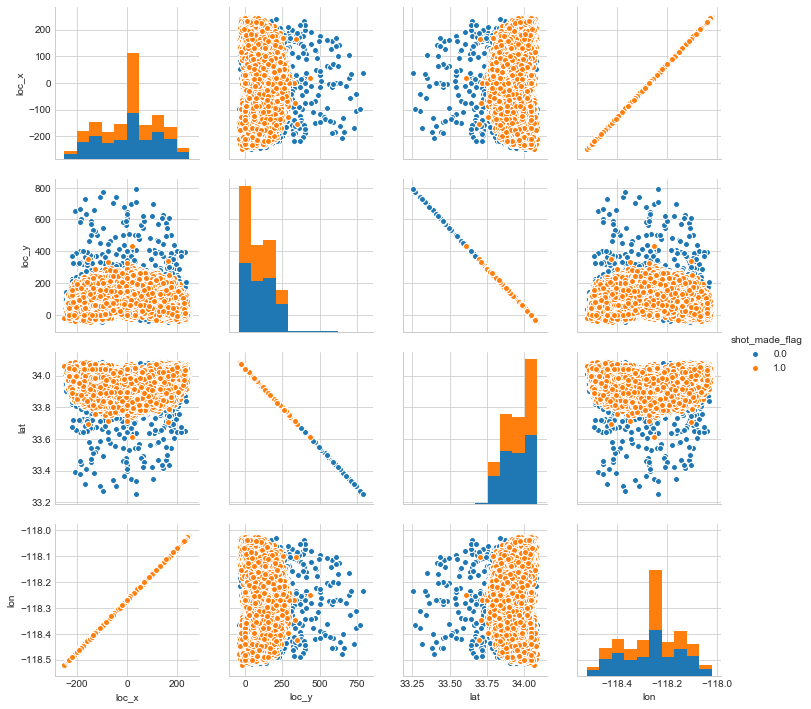

In [9]:
sns.set_style('whitegrid')
# seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_made_flag')

In [10]:
# there does seem to be some redundancy, so i will choose to analyze loc_x and loc_y and thus remove lon and lat
not_needed.extend(['lon', 'lat'])

As for the time categories, there are 2 of them: minutes_remaining and seconds_remaining.
Seems like it would be better to have one category of 'time_remaining' in seconds.

In [11]:
# create a new column called 'time_remaining', where we convert minutes_remaining to seconds by multiplying by 60
# and add that to seconds_remaining, now that we have the same unit of time
df['time_remaining'] = 60 * df.loc[:, 'minutes_remaining'] + df.loc[:, 'seconds_remaining']

In [12]:
# now that we have a new and improved time category, we will be removing minutes_remaining and seconds_remaining
not_needed.extend(['minutes_remaining', 'seconds_remaining'])

In [13]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,627
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,379


## Where we at:

If we look at the above dataframe head, we have looked at:
- action_type
- combined_shot_type
- game_event_id
- game_id
- lat
- loc_x
- loc_y
- lon
- minutes remaining
- seconds remaining

and we have decided whether we want to keep, remove, or transform these values

we have a bit of ways to go, but it's good to keep in mind what's been happening


In [14]:
# what are the unique values of 'period'?
df['period'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Period, or 'quarter' is actually divided into a numpy array of 7 values. Values 5-7 likely are OT, 2OT, and 3OT respectively.

In [15]:
# unique playoff values?
df['playoffs'].unique()

array([0, 1], dtype=int64)

The playoffs column represents a flag of whether Kobe made the playoffs that year...0 being no, 1 being yes.

In [16]:
# shot_made_flag
df['shot_made_flag'].unique()

array([nan,  0.,  1.])

Ahh, so for shot_made_flag, we have some null values that we need to address...later.

In [17]:
df['season'].unique() # note that each season covers two years

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [18]:
# instead, we can just utilize one of the two years, which here I elect to shave off the first year and only keep the second
# also note that values in 'season', now that they are a string of a single number, is converted to a numeric value
df['season'] = df['season'].apply(lambda x: x[:4])
df['season'] = pd.to_numeric(df['season'])
df['season'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 1996, 1997, 1998, 1999], dtype=int64)

In [20]:
# verify the data type
type(df['season'][0])

numpy.int64

In [22]:
type(df['shot_distance'][0])

numpy.int64

In [24]:
# shot distance
# we will create a 'true_dist' column that will equate based on the loc_x and loc_y values
# we change the name of shot_distance to shot_dist
dist = pd.DataFrame({'true_dist': np.sqrt((df['loc_x']/10)**2 + (df['loc_y']/10)**2), 
                     'shot_dist': df['shot_distance']})
dist[:10] # select the first 10 index values for this 'dist' dataframe

,true_dist,shot_dist
0,18.185984,18
1,15.700000,15
2,16.860012,16
3,22.286543,22
4,0.000000,0
5,14.541664,14
6,0.000000,0
7,2.801785,2
8,12.605158,12
9,12.928264,12


In [25]:
df['shot_distance_'] = dist['true_dist']
not_needed.append('shot_distance')

In [26]:
# shot type unique values
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [27]:
# create 3pt_goal
df['3pt_goal'] = df['shot_type'].str.contains('3PT').astype('int')
not_needed.append('shot_type')

In [32]:
df['shot_type'].str.contains('2PT').astype('int')

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       0
11       1
12       1
13       1
14       1
15       1
16       1
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       0
28       1
29       1
        ..
30667    0
30668    1
30669    1
30670    1
30671    1
30672    1
30673    1
30674    0
30675    0
30676    1
30677    1
30678    1
30679    1
30680    1
30681    0
30682    1
30683    1
30684    1
30685    0
30686    1
30687    1
30688    1
30689    0
30690    1
30691    1
30692    1
30693    1
30694    1
30695    0
30696    1
Name: shot_type, Length: 30697, dtype: int32

In [34]:
print(df['shot_zone_range'].unique()) # looks like we don't really need, floor position is more descriptive
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [ ]:
not_needed.append('shot_zone_range')

## Visualization Returned

In [35]:
# visualize shot_zone_area

area_group = df.groupby('shot_zone_area') 
basic_group = df.groupby('shot_zone_basic')

In [41]:
colors = list('rgbcmyk')

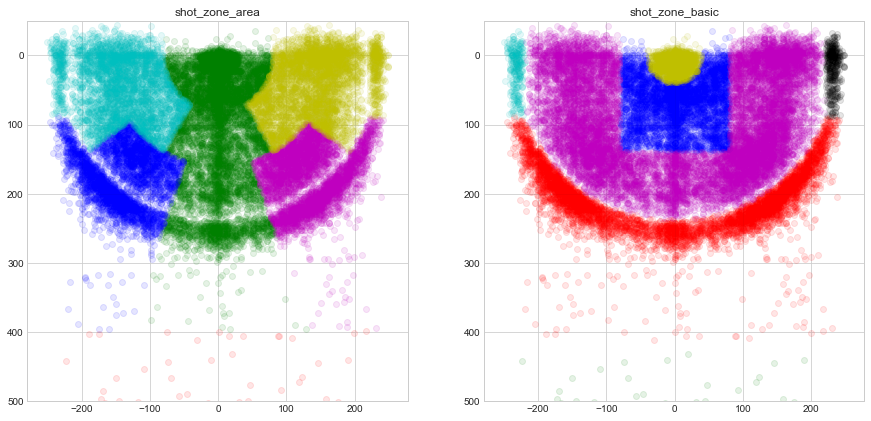

In [42]:
plt.subplots(1, 2, figsize=(15, 7), sharey=True)
# plot shot_zone_area, using area_group to iterate through
plt.subplot(121)
plt.ylim(500, -50)
plt.title('shot_zone_area')
for i, (_, area) in enumerate(area_group):
    plt.scatter(area['loc_x'], area['loc_y'], alpha=0.1, color=colors[i])
    
# plot shot_zone_basic as an enumerate
plt.subplot(122)
plt.ylim(500, -50)
plt.title('shot_zone_basic')
for i, (_, basic) in enumerate(basic_group):
    plt.scatter(basic['loc_x'], basic['loc_y'], alpha=0.1, color=colors[i])

In [44]:
# team id and name
# there is only one value per, which isn't surprising since kobe was a laker for his 20 year career
print(df['team_id'].unique())
print(df['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [45]:
# kobe was on same team so let's remove
not_needed.extend(['team_id', 'team_name'])

In [46]:
# convert game_date to datetime format
# split year, month, weekday

# first convert 'game_date' to pandas date time
df['game_date'] = pd.to_datetime(df['game_date'])

In [49]:
type(df['game_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
df['game_date'].dt.month

0        10
1        10
2        10
3        10
4        10
5        10
6        10
7        10
8        10
9        10
10       10
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
30667     6
30668     6
30669     6
30670     6
30671     6
30672     6
30673     6
30674     6
30675     6
30676     6
30677     6
30678     6
30679     6
30680     6
30681     6
30682     6
30683     6
30684     6
30685     6
30686     6
30687     6
30688     6
30689     6
30690     6
30691     6
30692     6
30693     6
30694     6
30695     6
30696     6
Name: game_date, Length: 30697, dtype: int64

In [53]:
# create new columns: year, month, and day
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek

not_needed.append('game_date')

In [57]:
# let's create columns for home and away games
# home has vs., away has @
df['matchup']

0          LAL @ POR
1          LAL @ POR
2          LAL @ POR
3          LAL @ POR
4          LAL @ POR
5          LAL @ POR
6          LAL @ POR
7          LAL @ POR
8          LAL @ POR
9          LAL @ POR
10         LAL @ POR
11       LAL vs. UTA
12       LAL vs. UTA
13       LAL vs. UTA
14       LAL vs. UTA
15       LAL vs. UTA
16       LAL vs. UTA
17       LAL vs. UTA
18       LAL vs. UTA
19       LAL vs. UTA
20       LAL vs. UTA
21       LAL vs. UTA
22       LAL vs. UTA
23       LAL vs. UTA
24       LAL vs. UTA
25       LAL vs. UTA
26       LAL vs. UTA
27       LAL vs. UTA
28       LAL vs. UTA
29       LAL vs. UTA
            ...     
30667      LAL @ IND
30668      LAL @ IND
30669      LAL @ IND
30670    LAL vs. IND
30671    LAL vs. IND
30672    LAL vs. IND
30673    LAL vs. IND
30674    LAL vs. IND
30675    LAL vs. IND
30676    LAL vs. IND
30677    LAL vs. IND
30678    LAL vs. IND
30679    LAL vs. IND
30680    LAL vs. IND
30681    LAL vs. IND
30682    LAL vs. IND
30683    LAL 

In [58]:
# matchup and opponent
df['home_game'] = df['matchup'].str.contains('vs.').astype(int) # create a column home_game, where any matchups that have 'vs.' are considered home
# convert true/false return value to an int
not_needed.append('matchup')

In [59]:
df['shot_id']

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
30667    30668
30668    30669
30669    30670
30670    30671
30671    30672
30672    30673
30673    30674
30674    30675
30675    30676
30676    30677
30677    30678
30678    30679
30679    30680
30680    30681
30681    30682
30682    30683
30683    30684
30684    30685
30685    30686
30686    30687
30687    30688
30688    30689
30689    30690
30690    30691
30691    30692
30692    30693
30693    30694
30694    30695
30695    30696
30696    30697
Name: shot_id, Length: 30697, dtype: int64

In [60]:
# shot id...set to index
df.set_index('shot_id', inplace=True)

## Now is the time we've been waiting for...let's drop all the columns in not_needed!

In [62]:
# drop columns we don't need
df = df.drop(not_needed, axis=1)

In [64]:
df.info() # notice we have 19 columns total...we deleted a lot, but we also added a few

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 19 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null int64
shot_made_flag        25697 non-null float64
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
opponent              30697 non-null object
time_remaining        30697 non-null int64
shot_distance_        30697 non-null float64
3pt_goal              30697 non-null int32
game_year             30697 non-null int64
game_month            30697 non-null int64
game_day              30697 non-null int64
home_game             30697 non-null int32
dtypes: float64(2), int32(2), int64(9), object(6)
memory usage: 

In [65]:
pd.set_option('display.max_columns', None)
random_sample = df.take(np.random.permutation(len(df))[:10])
random_sample.head(10)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_made_flag,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,time_remaining,shot_distance_,3pt_goal,game_year,game_month,game_day,home_game
shot_id,,,,,,,,,,,,,,,,,,,
27573,Jump Shot,Jump Shot,-113,109,3,1,2003,0.0,Left Side(L),Mid-Range,8-16 ft.,MIN,148,15.700318,0,2004,5,6,0
11016,Layup Shot,Layup,0,0,3,0,2006,NaN,Center(C),Restricted Area,Less Than 8 ft.,MIN,615,0.000000,0,2007,3,6,1
13169,Turnaround Fadeaway shot,Jump Shot,108,26,4,0,2008,1.0,Right Side(R),Mid-Range,8-16 ft.,POR,287,11.108555,0,2008,10,1,1
18675,Step Back Jump shot,Jump Shot,-24,187,2,0,2011,1.0,Center(C),Mid-Range,16-24 ft.,BOS,336,18.853382,0,2012,2,3,0
12060,Turnaround Bank shot,Bank Shot,113,79,1,0,2007,1.0,Right Side(R),Mid-Range,8-16 ft.,BOS,271,13.787676,0,2007,12,6,1
3924,Jump Shot,Jump Shot,-13,248,1,0,2002,NaN,Center(C),Above the Break 3,24+ ft.,MIA,109,24.834049,1,2003,1,6,1
19341,Turnaround Fadeaway shot,Jump Shot,-2,101,1,0,2011,1.0,Center(C),In The Paint (Non-RA),8-16 ft.,LAC,41,10.101980,0,2012,4,2,0
14426,Layup Shot,Layup,0,0,3,0,2008,1.0,Center(C),Restricted Area,Less Than 8 ft.,PHX,452,0.000000,0,2009,3,6,0
16652,Jump Shot,Jump Shot,48,263,1,0,2010,1.0,Center(C),Above the Break 3,24+ ft.,DET,585,26.734435,1,2010,11,2,0


## Data Exploration

In [69]:
### split data
submission_data = df[df['shot_made_flag'].isnull()] 
submission_data = submission_data.drop('shot_made_flag', 1)
submission_data.shape

(5000, 18)

In [70]:
submission_data

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,time_remaining,shot_distance_,3pt_goal,game_year,game_month,game_day,home_game
shot_id,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000,Right Side(R),Mid-Range,16-24 ft.,POR,627,18.185984,0,2000,10,1,0
8,Jump Shot,Jump Shot,1,28,3,0,2000,Center(C),Restricted Area,Less Than 8 ft.,POR,485,2.801785,0,2000,10,1,0
17,Driving Layup Shot,Layup,0,0,1,0,2000,Center(C),Restricted Area,Less Than 8 ft.,UTA,1,0.000000,0,2000,11,2,1
20,Driving Layup Shot,Layup,0,0,3,0,2000,Center(C),Restricted Area,Less Than 8 ft.,UTA,646,0.000000,0,2000,11,2,1
33,Jump Shot,Jump Shot,163,76,1,0,2000,Right Side(R),Mid-Range,16-24 ft.,VAN,686,17.984716,0,2000,11,5,0
34,Jump Shot,Jump Shot,70,194,1,0,2000,Right Side Center(RC),Mid-Range,16-24 ft.,VAN,658,20.624258,0,2000,11,5,0
35,Layup Shot,Layup,1,19,1,0,2000,Center(C),Restricted Area,Less Than 8 ft.,VAN,453,1.902630,0,2000,11,5,0
36,Layup Shot,Layup,-12,15,1,0,2000,Center(C),Restricted Area,Less Than 8 ft.,VAN,358,1.920937,0,2000,11,5,0
37,Reverse Layup Shot,Layup,1,4,1,0,2000,Center(C),Restricted Area,Less Than 8 ft.,VAN,249,0.412311,0,2000,11,5,0


In [71]:
data = df[df['shot_made_flag'].notnull()]
data.shape

(25697, 19)

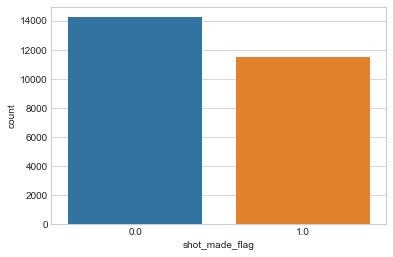

In [73]:
# data exploration
# Compare shots made vs. shots missed
sns.countplot(x='shot_made_flag', data=data)

In [79]:
data['shot_made_flag'].shape

(25697,)

In [77]:
data['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [80]:
# make or miss
data['shot_made_flag'].value_counts()/ data['shot_made_flag'].shape
# kobe is a 46% career shooter

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

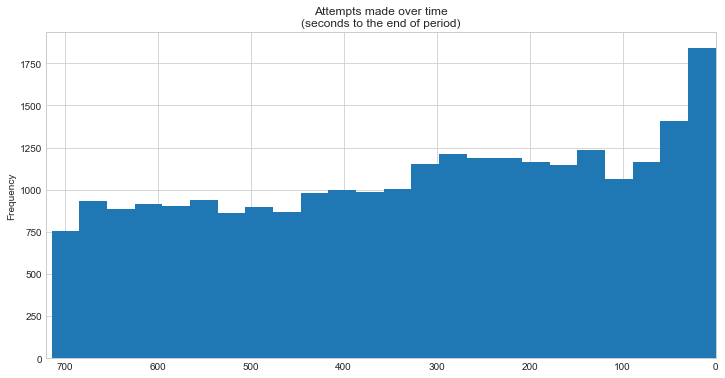

In [81]:
data['time_remaining'].plot(kind='hist', bins=24, xlim=(720, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

In [86]:
# in seconds...explore to minute and beyond
# kobe seems to like to shoot more as the game is close to ending (surpise surprise)
last_30 = data[data['time_remaining'] < 30] 
last_30['shot_made_flag'].value_counts() / last_30['shot_made_flag'].shape

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

Note: Kobe actually shoots WORSE within the last 30s, contrary to popular belief

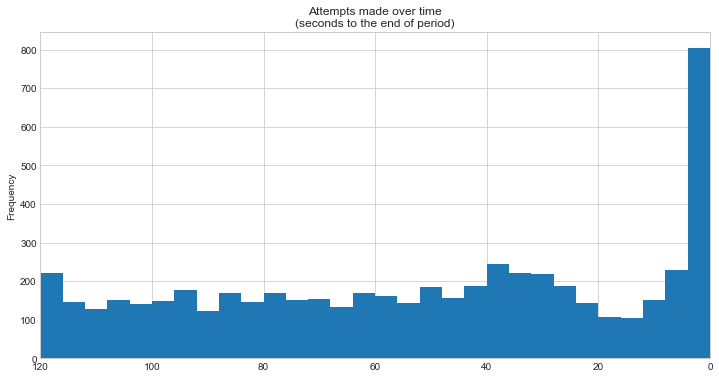

In [84]:
last_2min = data[data['time_remaining'] <= 120]

last_2min['time_remaining'].plot(kind='hist', bins=30, xlim=(120, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

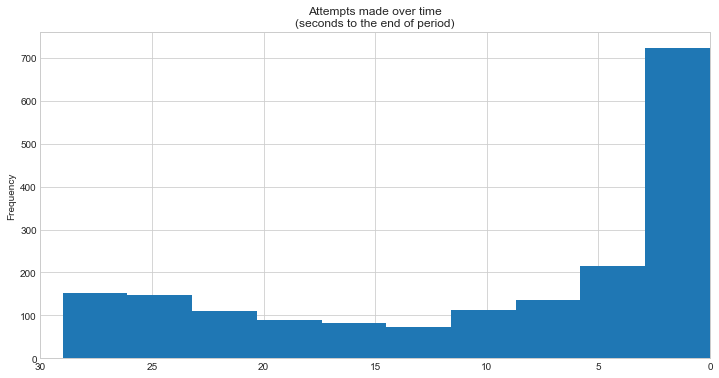

In [85]:
# back to last 30s
last_30['time_remaining'].plot(kind='hist', bins=10, xlim=(30, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

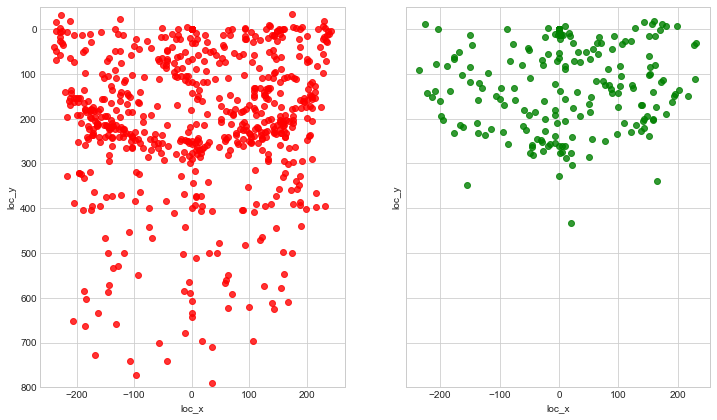

In [87]:
# last 5 seconds
last_5sec_misses = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 0)]
last_5sec_scores = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 1)]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=last_5sec_misses, fit_reg=False, ax=ax1, color='r')
sns.regplot(x='loc_x', y='loc_y', data=last_5sec_scores, fit_reg=False, ax=ax2, color='g')

In [88]:
# close shots within 5 seconds
last_5sec_close = data[(data['time_remaining'] <= 5) & (data['shot_distance_'] <= 20)]

last_5sec_close['shot_made_flag'].value_counts() / last_5sec_close['shot_made_flag'].shape

0.0    0.604317
1.0    0.395683
Name: shot_made_flag, dtype: float64

In [89]:
# close shots
close_shots = data[(data['time_remaining'] > 5) & (data['shot_distance_'] <= 20)]

close_shots['shot_made_flag'].value_counts() / close_shots['shot_made_flag'].shape

0.0    0.512264
1.0    0.487736
Name: shot_made_flag, dtype: float64

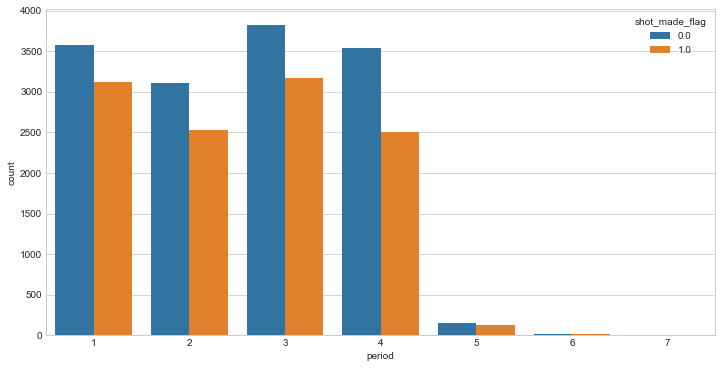

In [90]:
# period accuracy
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=data)

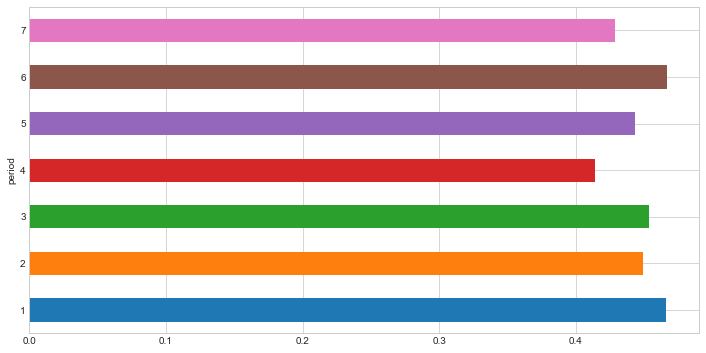

In [91]:
# accuracy by period
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

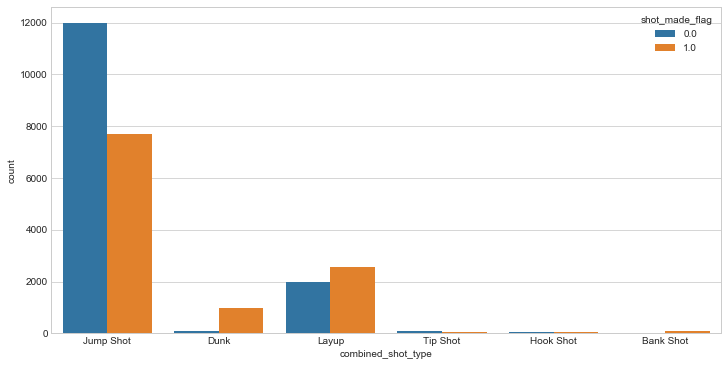

In [92]:
# accuracy based on shot type
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)

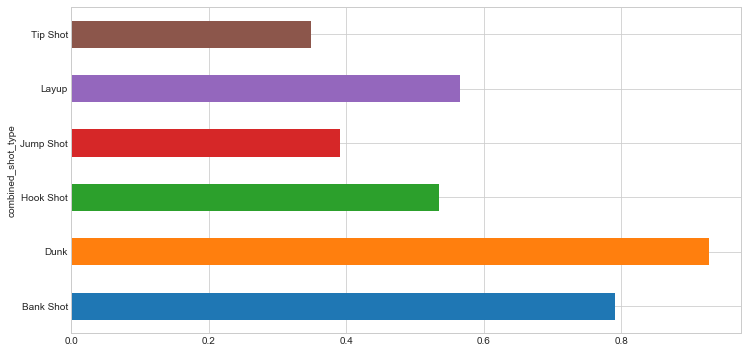

In [93]:
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

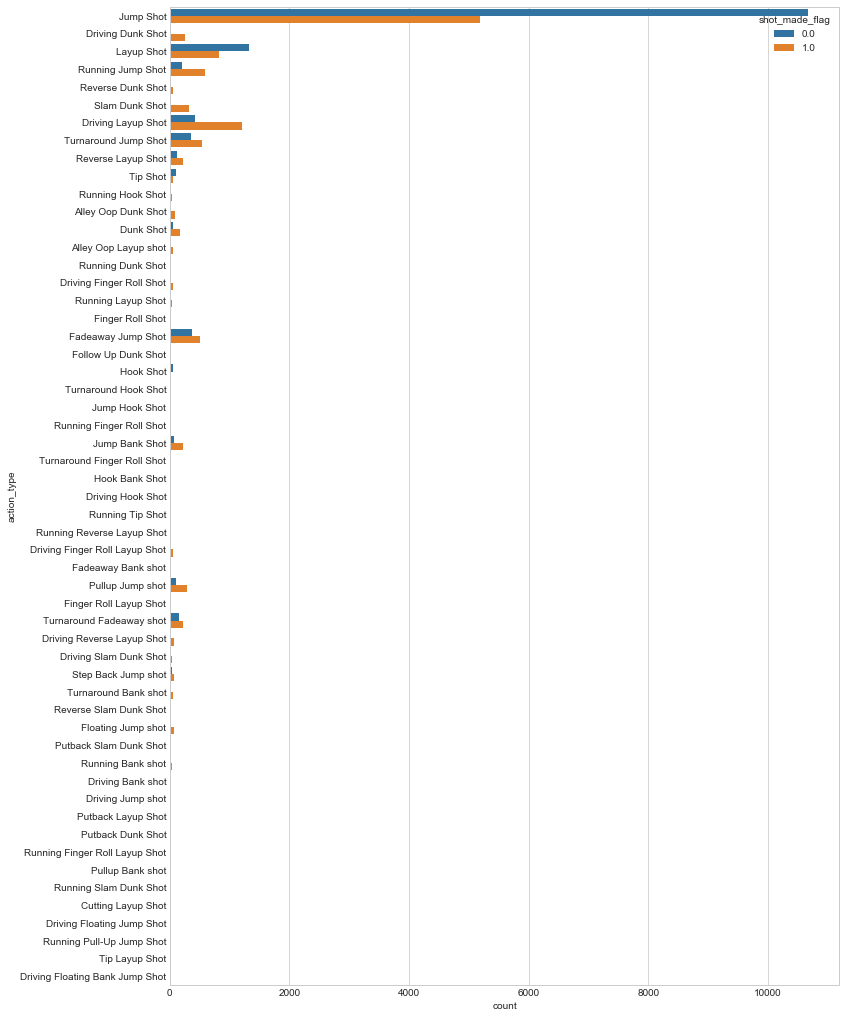

In [94]:
# action type...# of shots
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

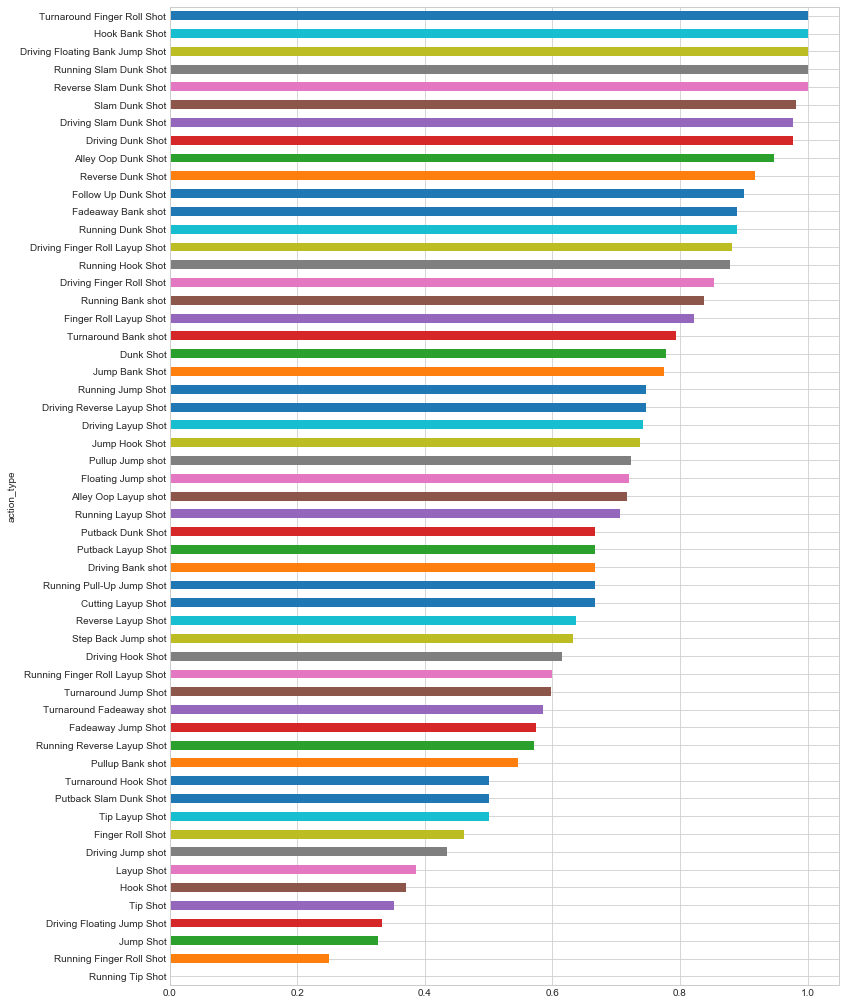

In [95]:
action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

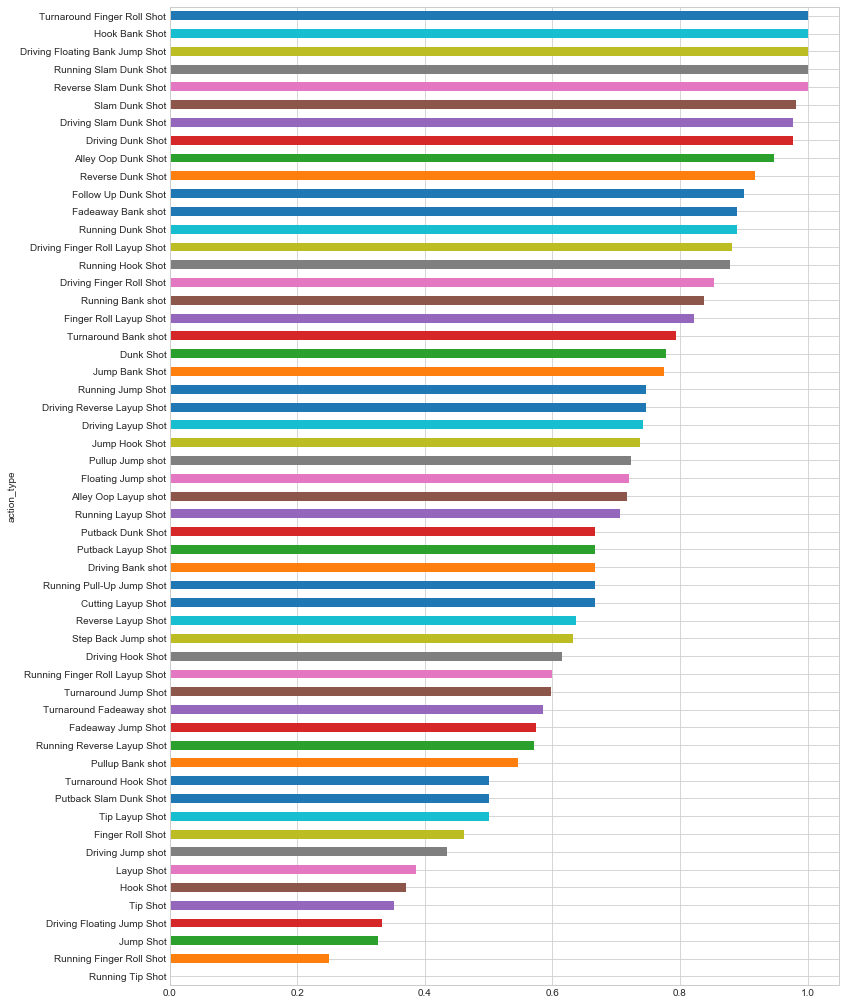

In [96]:
 action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

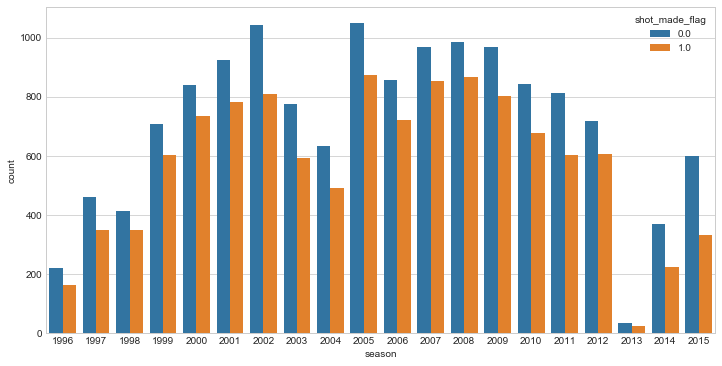

In [97]:
# career accuracy
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

In [ ]:
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

In [ ]:
# shots per month
plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=data)

In [ ]:
game_month = data['shot_made_flag'].groupby(data['game_month']).mean()
game_month.plot(kind='barh', figsize=(12, 6))

In [ ]:
# by day of week
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

In [ ]:
game_day = data['shot_made_flag'].groupby(data['game_day']).mean()
game_day.plot(kind='barh', figsize=(12, 6))

In [ ]:
# regular season vs playoffs
plt.figure(figsize=(12,6))
sns.countplot(x="playoffs", hue="shot_made_flag", data=data)

In [ ]:
playoffs = data['shot_made_flag'].groupby(data['playoffs']).mean()
playoffs.plot(kind='barh', figsize=(12, 2), xlim=(0, 0.50))

In [ ]:
# accuracy based on shot distance
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(data['shot_distance_'], distance_bins, right=False)

dist_data = data.loc[:, ['shot_distance_', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

In [ ]:
# number of shots in each distance category
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

In [ ]:
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

In [ ]:
# accuracy based on shot zones
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

In [ ]:
shot_area = data['shot_made_flag'].groupby(data['shot_zone_area']).mean()
shot_area.plot(kind='barh', figsize=(12, 6))

In [ ]:
# shot zone basic
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data)

In [ ]:
shot_basic = data['shot_made_flag'].groupby(data['shot_zone_basic']).mean()
shot_basic.plot(kind='barh', figsize=(12, 6))

In [ ]:
# home vs away
plt.figure(figsize=(12,6))
sns.countplot(x="home_game", hue="shot_made_flag", data=data)

In [ ]:
shot_basic = data['shot_made_flag'].groupby(data['home_game']).mean()
shot_basic.plot(kind='barh', figsize=(12, 2))

In [ ]:
# accuracy compared to opponent
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

In [ ]:
opponent = data['shot_made_flag'].groupby(data['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(12,10))